In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.8 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from ultralytics import YOLO
import cv2
import glob
import numpy as np
import os
import shutil
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

In [ ]:
model = YOLO("/home/vm2/marjan/ppe_main_data/yolo11x.pt")

In [ ]:
model.train(data='/home/vm2/marjan/ppe_main_data/data.yaml', epochs=20, batch=64, imgsz=640)


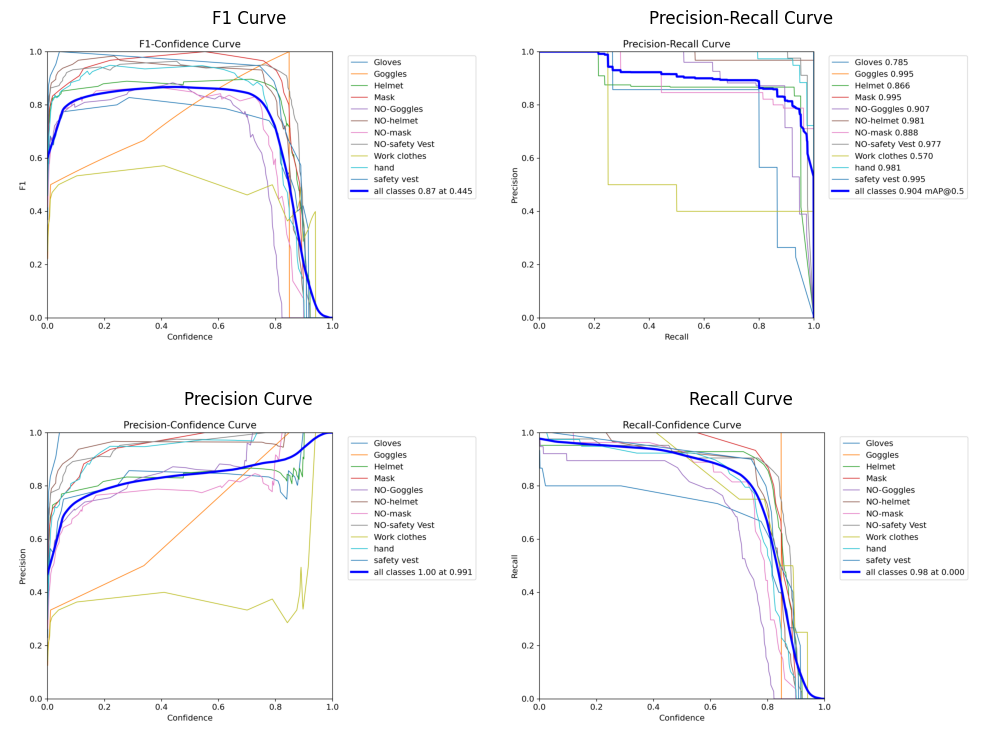

In [11]:

f1_path = '/content/drive/MyDrive/DU/train4/BoxF1_curve.png'
pr_path = '/content/drive/MyDrive/DU/train4/BoxPR_curve.png'
p_path = '/content/drive/MyDrive/DU/train4/BoxP_curve.png'
r_path = '/content/drive/MyDrive/DU/train4/BoxR_curve.png'
confusion_path = '/content/drive/MyDrive/DU/train4/confusion_matrix_normalized.png'


images = [
    (Image.open(f1_path), 'F1 Curve'),
    (Image.open(pr_path), 'Precision-Recall Curve'),
    (Image.open(p_path), 'Precision Curve'),
    (Image.open(r_path), 'Recall Curve')
    ]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, (img, title) in enumerate(images):
    ax = axes[i // 2, i % 2]
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

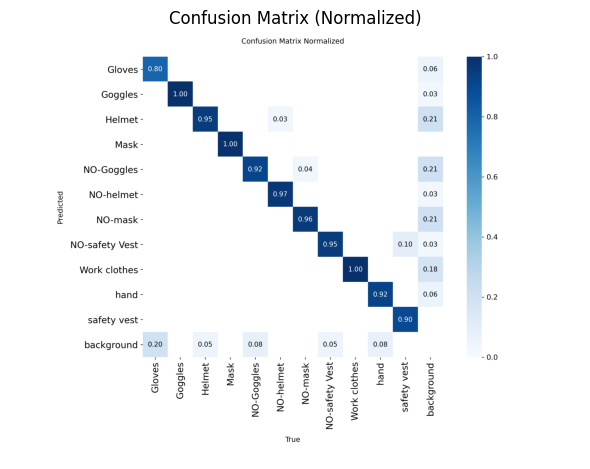

In [12]:
cm_image = Image.open(confusion_path)

plt.figure(figsize=(6, 6))
plt.imshow(cm_image)
plt.title("Confusion Matrix (Normalized)")
plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
model = YOLO("/content/drive/MyDrive/DU/train4/weights/best.pt")

In [ ]:
metrics = model.val(
    data="/content/drive/MyDrive/DU/test.yaml",
    split='test'
)
precision = metrics.results_dict["metrics/precision(B)"]
recall = metrics.results_dict["metrics/recall(B)"]
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)
print(f"F1-score      : {f1_score:.4f}")


Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 190 layers, 56,839,729 parameters, 0 gradients, 194.5 GFLOPs
val: Fast image access ✅ (ping: 1.0±1.1 ms, read: 9.4±20.6 MB/s, size: 88.4 KB)
val: Scanning /content/drive/MyDrive/DU/test/labels... 163 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 163/163 2.4it/s 1:09
val: New cache created: /content/drive/MyDrive/DU/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 0.8it/s 14.3s
                   all        163       1882      0.818      0.743      0.797      0.598
                Gloves         32         73       0.78      0.493      0.601      0.484
               Goggles         37         54      0.705      0.426      0.565        0.4
                Helmet        134        317      0.955      0.943      0.983      0.936
                  Mask         28        168      0.889      0.917 

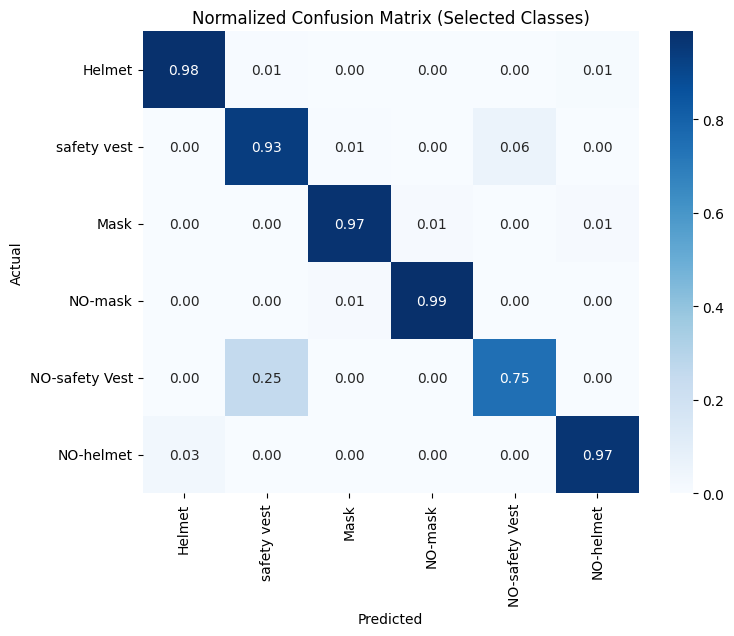

In [ ]:
cm = metrics.confusion_matrix.matrix

class_names = list(model.names.values())

selected_classes = ["Helmet", "safety vest", "Mask", "NO-mask", "NO-safety Vest", "NO-helmet"]
selected_idx = [class_names.index(c) for c in selected_classes]

cm_selected = cm[np.ix_(selected_idx, selected_idx)]
cm_normalized = cm_selected.astype(float) / cm_selected.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=selected_classes,
            yticklabels=selected_classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix (Selected Classes)")
plt.show()


image 1/1 /content/drive/MyDrive/DU/ppe_data/test/images/bpart2_000350.jpg: 640x640 1 Helmet, 1 NO-Goggles, 1 NO-mask, 1 NO-safety Vest, 1 hand, 1 safety vest, 93.4ms
Speed: 2.2ms preprocess, 93.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DU/ppe_data/test/images/bpart2_000343.jpg: 640x640 1 Gloves, 2 Helmets, 1 safety vest, 93.2ms
Speed: 1.6ms preprocess, 93.2ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DU/ppe_data/test/images/bpart2_000121.jpg: 640x640 2 Helmets, 1 NO-Goggles, 2 NO-masks, 1 NO-safety Vest, 1 hand, 2 safety vests, 78.2ms
Speed: 1.5ms preprocess, 78.2ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/DU/ppe_data/test/images/bpart2_000309.jpg: 640x640 1 Goggles, 1 Helmet, 1 NO-mask, 1 hand, 1 safety vest, 52.7ms
Speed: 1.5ms preprocess, 52.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640

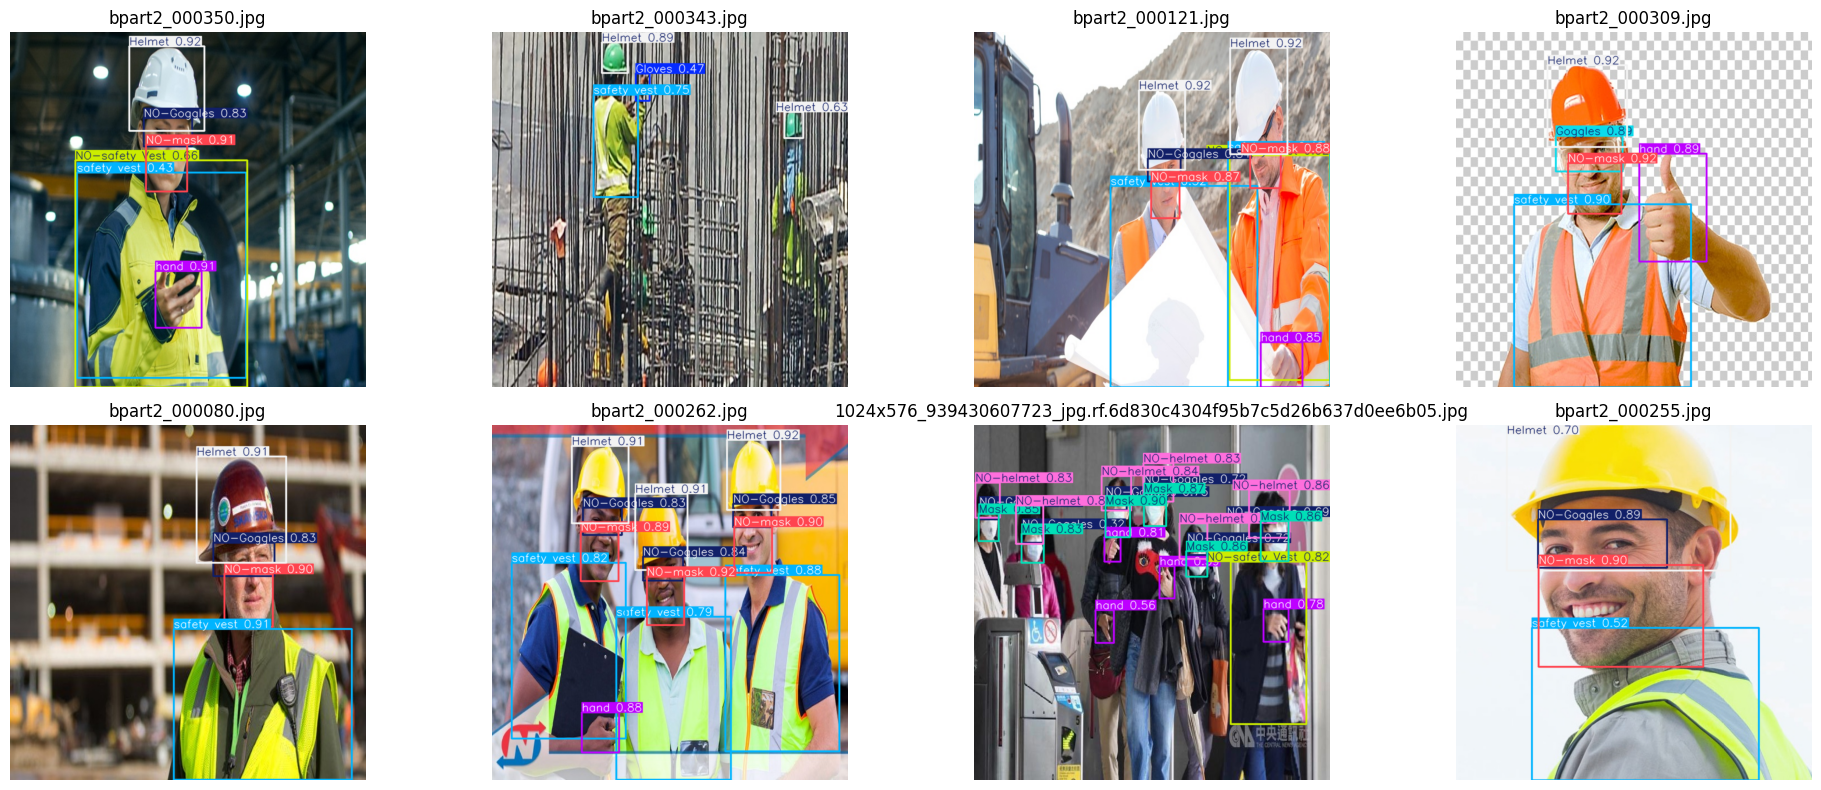

In [9]:
img_dir = "/content/drive/MyDrive/DU/ppe_data/test/images"

all_imgs = [os.path.join(img_dir, f) for f in os.listdir(img_dir)
            if f.lower().endswith((".jpg", ".png", ".jpeg"))]

sample_imgs = random.sample(all_imgs, 8)

rows, cols = 2, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
axes = axes.flatten()

for idx, img_path in enumerate(sample_imgs):
    results = model.predict(source=img_path, save=False, conf=0.25, device=0)

    annotated_img = results[0].plot()

    axes[idx].imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(os.path.basename(img_path))
    axes[idx].axis("off")

plt.tight_layout()
plt.show()
